E:\aconda\aconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 1.53911842
MSE =  [1.53911842]
RMSE =  1.240612116483285
MAE =  [0.81802194]
Target Variance =  0.5794948086876661
Target Standard Deviation =  0.7612455639855421


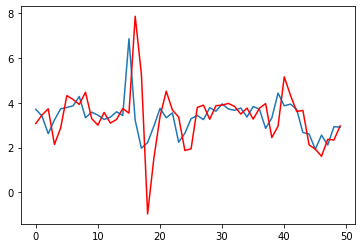

Test MSE: 0.29093428
MSE =  [0.29093428]
RMSE =  0.5393832381704248
MAE =  [0.32186501]
Target Variance =  0.02747578045728413
Target Standard Deviation =  0.16575819876339187


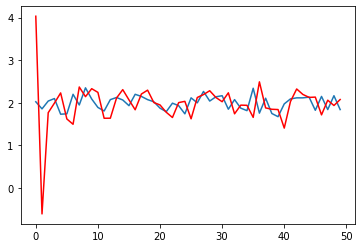

Test MSE: 0.00021347
MSE =  [0.00021347]
RMSE =  0.014610681933509418
MAE =  [0.0102509]
Target Variance =  0.0007648399999999999
Target Standard Deviation =  0.027655740814521674


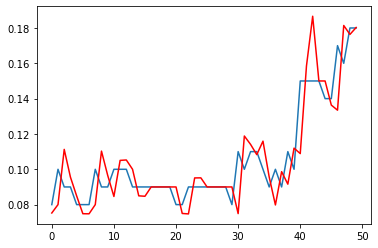

Test MSE: 0.00007175
MSE =  [7.17526775e-05]
RMSE =  0.008470695219446888
MAE =  [0.00573874]
Target Variance =  0.00025856000000000007
Target Standard Deviation =  0.016079800993793428


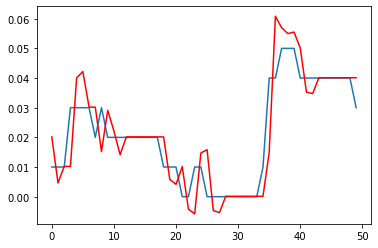

Test MSE: 0.02102280
MSE =  [0.0210228]
RMSE =  0.14499242867199305
MAE =  [0.06235001]
Target Variance =  0.16236538693779945
Target Standard Deviation =  0.40294588586781654


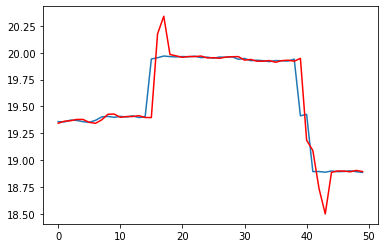

Test MSE: 0.02016501
MSE =  [0.02016501]
RMSE =  0.14200356575048928
MAE =  [0.0538252]
Target Variance =  0.2832195395110411
Target Standard Deviation =  0.5321837460041796


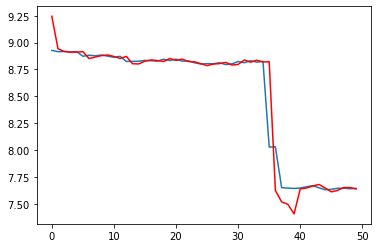

Test MSE: 870.04551590
MSE =  [870.0455159]
RMSE =  29.496533964251775
MAE =  [21.52513766]
Target Variance =  4824.5901800400015
Target Standard Deviation =  69.45926993598479


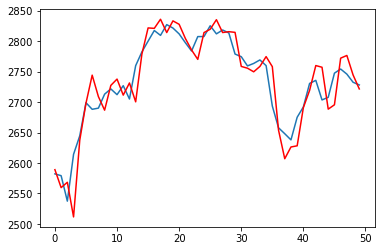

In [5]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
series = pd.read_excel(r'C:/Users/stu/Desktop/ALLDATA.xlsx')
# fit model
X1 =series.values
prediction1=[]
MSE=[]
RMSE=[]
MAE=[]
for i in range(7):
    X=X1[:,i]
    #size = int(len(X) * 0.95)
    #train, test = X[0:size], X[size:len(X)]
    train, test =  X[1000:1050], X[1050:1100]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(1,2,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.8f' % error)
    target = test
    prediction1.append(predictions)
    error = []
    for j in range(len(target)):
        error.append(target[j] - prediction1[i][j])

    squaredError = []
    absError = []
    for val in error:
        squaredError.append(val * val)#target-prediction之差平方 
        absError.append(abs(val))#误差绝对值
#print("Square Error: ", squaredError)
#print("Absolute Value of Error: ", absErr)
    print("MSE = ", sum(squaredError) / len(squaredError))#均方误差MSE
    MSE.append(sum(squaredError) / len(squaredError))
    from math import sqrt
    print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))#均方根误差RMSE
    RMSE.append(sqrt(sum(squaredError) / len(squaredError)))
    print("MAE = ", sum(absError) / len(absError))#平均绝对误差MAE
    MAE.append(sum(absError) / len(absError))
    targetDeviation = []
    targetMean = sum(target) / len(target)#target平均值
    for val in target:
        targetDeviation.append((val - targetMean) * (val - targetMean))
    print("Target Variance = ", sum(targetDeviation) / len(targetDeviation))#方差
    print("Target Standard Deviation = ", sqrt(sum(targetDeviation) / len(targetDeviation)))#标准差
    target=[]
    pyplot.plot(test)
    pyplot.plot(predictions, color='red')
    pyplot.show()


# plot



In [2]:
# coding=utf-8
import numpy as np
from sklearn import metrics
MSE=[]
RMSE=[]
MAE=[]
m0,n0=series.shape
for i in range(n0):
    y_true = X1[:,i][1000:1050]
    y_pred = prediction1[i]
    m1=metrics.mean_squared_error(y_true, y_pred)
    print('MSE:',metrics.mean_squared_error(y_true, y_pred))
    MSE.append(m1)
    m2=np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    #print('RMSE:',np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
    RMSE.append(m2)
    m3=metrics.mean_absolute_error(y_true, y_pred)
    #print('MAE:',metrics.mean_absolute_error(y_true, y_pred))
    MAE.append(m3)

MSE: 1.6635780610883544
MSE: 1.1094770208501779
MSE: 0.00216518589933727
MSE: 0.0007371005838209716
MSE: 1.307290100509745
MSE: 2.9586155051163496
MSE: 71643.78492841258


In [11]:
import xlsxwriter   #导入模块

workbook = xlsxwriter.Workbook('Larima.xlsx')     #新建excel表
worksheet= workbook.add_worksheet('sheet1')
worksheet2= workbook.add_worksheet('sheet2')
#worksheet= ['CPU1','CPU2','Load1','Load2','Memory1','Memory2']     #设置表头
headings = ['stock','cpu1','goods','thyroid']   
worksheet.write_row('A1',headings)
worksheet.write_column('A2',np.array(prediction1)[0])
worksheet.write_column('B2',np.array(prediction1)[1])
worksheet.write_column('C2',np.array(prediction1)[2]) 
worksheet.write_column('D2',np.array(prediction1)[3])
#worksheet.write_column('E2',np.array(prediction1)[4])
#worksheet.write_column('F2',np.array(prediction1)[5]) 
headings2 = ['MSE','RMSE','MAE'] 
worksheet2.write_row('A1',headings2)
worksheet2.write_column('A2',np.array(MSE))
worksheet2.write_column('B2',np.array(RMSE))
worksheet2.write_column('C2',np.array(MAE)) 
#将数据插入到表格中 
workbook.close() 

AttributeError: 'list' object has no attribute 'shape'

predicted=0.574916, expected=0.580000
predicted=0.585160, expected=0.570000
predicted=0.573973, expected=0.560000
predicted=0.561349, expected=0.560000
predicted=0.562120, expected=0.580000
predicted=0.586563, expected=0.620000
predicted=0.633471, expected=0.670000
predicted=0.688593, expected=0.660000
predicted=0.662781, expected=0.690000
predicted=0.695664, expected=0.740000
predicted=0.753611, expected=0.720000
predicted=0.720702, expected=0.700000
predicted=0.705158, expected=0.690000
predicted=0.687345, expected=0.660000
predicted=0.651816, expected=0.670000
predicted=0.678544, expected=0.660000
predicted=0.663320, expected=0.650000
predicted=0.655062, expected=0.650000
predicted=0.654618, expected=0.650000
predicted=0.652932, expected=0.670000
predicted=0.679063, expected=0.680000
predicted=0.687272, expected=0.670000
predicted=0.673661, expected=0.660000
predicted=0.661027, expected=0.650000
predicted=0.648965, expected=0.670000
predicted=0.676998, expected=0.660000
predicted=0.

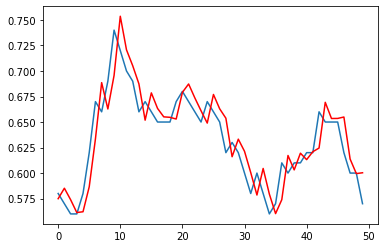

In [8]:
from pandas import read_csv
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

series = pd.read_excel(r'C:/Users/stu/Desktop/ALLDATA.xlsx').values
X = series[:,2]
#size = int(len(X) * 0.66)
train, test = X[0:100], X[100:150]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.10f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [ ]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa import arima_model
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error
import warnings
from matplotlib import pyplot
warnings.filterwarnings("ignore")





def ARIMA(series,n):
    series = np.array(series)
    series = pd.Series(series.reshape(-1))
    currentDir = os.getcwd()#当前工作路径
    #一阶差分数据
    fd = series.diff(1)[1:]
    plot_acf(fd).savefig(currentDir+'/一阶差分自相关图.png')
    plot_pacf(fd).savefig(currentDir+'/一阶差分偏自相关图.png')
    #一阶差分单位根检验
    unitP = adfuller(fd)[1]
    if unitP>0.05:
        unitAssess = '单位根检验中p值为%.2f，大于0.05，认为该一阶差分序列判断为非平稳序列'%(unitP)
        #print('单位根检验中p值为%.2f，大于0.05，认为该一阶差分序列判断为非平稳序列'%(unitP))
    else:
        unitAssess = '单位根检验中p值为%.2f，小于0.05，认为该一阶差分序列判断为平稳序列'%(unitP)
        #print('单位根检验中p值为%.2f，小于0.05，认为该一阶差分序列判断为平稳序列'%(unitP))
    #白噪声检验
    noiseP = acorr_ljungbox(fd, lags=1)[-1]
    if noiseP<=0.05:
        noiseAssess = '白噪声检验中p值为%.2f，小于0.05，认为该一阶差分序列为非白噪声'%noiseP
        #print('白噪声检验中p值为%.2f，小于0.05，认为该一阶差分序列为非白噪声'%noiseP)
    else:
        noiseAssess = '白噪声检验中%.2f，大于0.05，认为该一阶差分序列为白噪声'%noiseP
        #print('白噪声检验中%.2f，大于0.05，认为该一阶差分序列为白噪声'%noiseP)
    #BIC准则确定p、q值
    pMax = int(series.shape[0]/10)# 一般阶数不超过length/10
    qMax = pMax# 一般阶数不超过length/10
    bics = list()
    for p in range(pMax + 1):
        tmp = list()
        for q in range(qMax + 1):
            try:
                tmp.append(arima_model.ARIMA(series, (p, 1, q)).fit().bic)
            except Exception as e:
                #print(str(e))
                tmp.append(1e+10)#加入一个很大的数
        bics.append(tmp)
    bics = pd.DataFrame(bics)
    p, q = bics.stack().idxmin()
    #print('BIC准则下确定p,q为%s,%s'%(p,q))
    #建模
    model = arima_model.ARIMA(series,order=(p, 1, q)).fit()
    predict = model.forecast(n)[0]
    return {
            'model':{'value':model,'desc':'模型'},
            'unitP':{'value':unitP,'desc':unitAssess},
            'noiseP':{'value':noiseP[0],'desc':noiseAssess},
            'p':{'value':p,'desc':'AR模型阶数'},
            'q':{'value':q,'desc':'MA模型阶数'},
            'params':{'value':model.params,'desc':'模型系数'},
            'predict':{'value':predict,'desc':'往后预测%d个的序列'%(n)}
            }

if __name__ == "__main__":
    data = pd.read_excel(r'C:/Users/stu/Desktop/ALLDATA.xlsx').values
    x = data[:,1][0:100]#输入数据
    y = data[:,1][100:150]#需要预测的数据
    result = ARIMA(x,len(y))#预测结果,一阶差分偏自相关图,一阶差分自相关图
    predict = result['predict']['value']
    predict = np.round(predict,1)
    error = mean_squared_error(y, predict)
    print('Test MSE: %.3f' % error)
    print('真实值:',y)
    print('预测值:',predict)
    print(result)

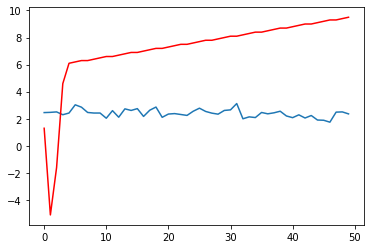

In [4]:
pyplot.plot(y)
pyplot.plot(predict,'r')
pyplot.show()

Test MSE: 0.47638179


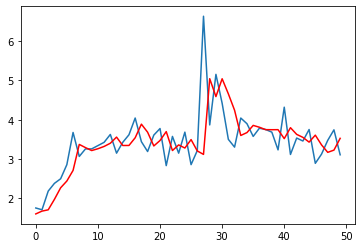

Test MSE: 1.02239079


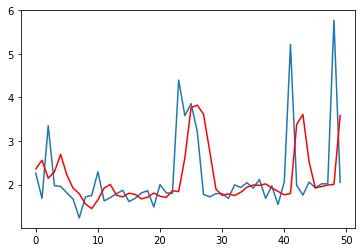

Test MSE: 0.00006412


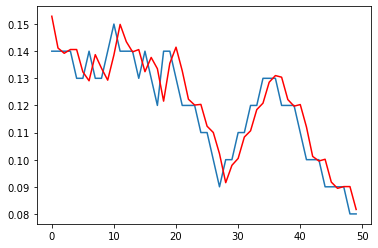

Test MSE: 0.00002909


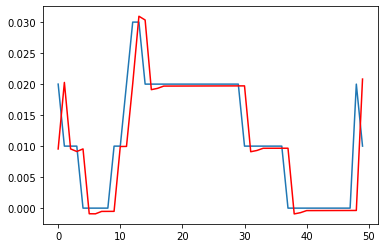

Test MSE: 0.00893954


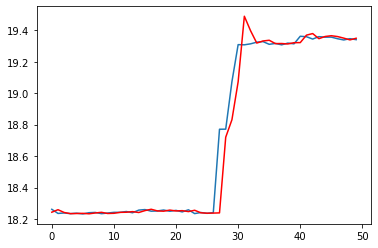

Test MSE: 0.02369798


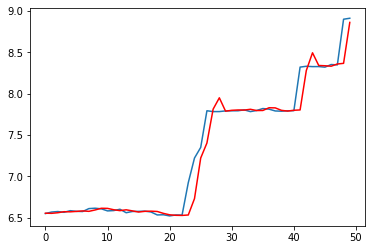

Test MSE: 807.07913137


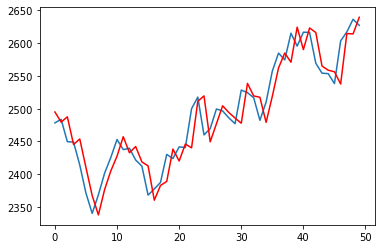

In [8]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import numpy as np
import pandas as pd
series = pd.read_excel(r'C:/Users/stu/Desktop/ALLDATA.xlsx')
# fit model
X1 =series.values
prediction1=[]
MSE=[]
RMSE=[]
MAE=[]
for i in range(7):
    X=X1[:,i]
    #size = int(len(X) * 0.95)
    #train, test = X[0:size], X[size:len(X)]
    train, test =  X[900:1000], X[1000:1050]
    history = [x for x in train]
    predictions =[]
    for t in range(len(test)):
        model = ARIMA(history, order=(2,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions)
    prediction1.append(predictions)
    print('Test MSE: %.8f' % error)
    MSE.append(error)
    m2=np.sqrt(error)
    RMSE.append(m2)
    m3=metrics.mean_absolute_error(test, predictions)
    MAE.append(m3)
    pyplot.plot(test)
    pyplot.plot(predictions, color='red')
    pyplot.show()

In [9]:
MSE

[0.4763817895835315,
 1.0223907871040394,
 6.411976069228537e-05,
 2.9090605773200856e-05,
 0.008939543815219182,
 0.023697977285487365,
 807.0791313723073]

In [11]:
import xlsxwriter   #导入模块
workbook = xlsxwriter.Workbook('MMLP.xlsx')     #新建excel表
worksheet= workbook.add_worksheet('sheet1')
worksheet2= workbook.add_worksheet('sheet2')
#worksheet= ['CPU1','CPU2','Load1','Load2','Memory1','Memory2']     #设置表头
headings = ['CPU1','CPU2','LOAD1','LOAD2','Memory1','Memory2','Stock']   
worksheet.write_row('A1',headings)
worksheet.write_column('A2',np.array(prediction1)[0])
worksheet.write_column('B2',np.array(prediction1)[1])
worksheet.write_column('C2',np.array(prediction1)[2]) 
worksheet.write_column('D2',np.array(prediction1)[3])
worksheet.write_column('E2',np.array(prediction1)[4])
worksheet.write_column('F2',np.array(prediction1)[5]) 
worksheet.write_column('G2',np.array(prediction1)[6])
#worksheet.write_column('E2',np.array(prediction1)[4])
#worksheet.write_column('F2',np.array(prediction1)[5]) 
headings2 = ['MSE','RMSE','MAE'] 
worksheet2.write_row('A1',headings2)
worksheet2.write_column('A2',np.array(MSE))
worksheet2.write_column('B2',np.array(RMSE))
worksheet2.write_column('C2',np.array(MAE)) 
#将数据插入到表格中 
workbook.close() 

Test MSE: 0.49161708


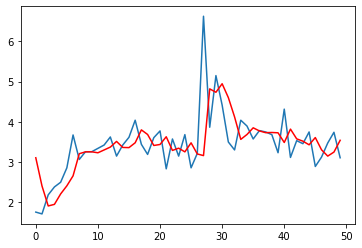

In [58]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import numpy as np
import pandas as pd
series = pd.read_excel(r'C:/Users/stu/Desktop/ALLDATA.xlsx')
x2 = pd.read_excel(r'C:\Users\stu\Desktop\ce.xlsx').values
# fit model
X1 =series.values
prediction1=[]
MSE=[]
RMSE=[]
MAE=[]
X=X1[:,0]
#size = int(len(X) * 0.95)
#train, test = X[0:size], X[size:len(X)]
train, test =  x2, X[1000:1050]
history = [x for x in train]
predictions =[]
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
prediction1.append(predictions)
print('Test MSE: %.8f' % error)
MSE.append(error)
m2=np.sqrt(error)
RMSE.append(m2)
m3=metrics.mean_absolute_error(test, predictions)
MAE.append(m3)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [62]:
import openpyxl as op
wb=op.load_workbook(r'C:\Users\stu\Desktop\result.xlsx')
sheet=wb.sheetnames
print(wb.sheetnames)
ws=wb['Sheet1']
print('len:',i)
for index,rw in enumerate(X[1000:1050]):
    #print(len(predictions))
    ws.cell(row = index+1, column =1).value = rw
wb.save(r'C:\Users\stu\Desktop\result.xlsx')

['100', '150', '200', '250', '300', '350', '400', '500', '600', 'Sheet1']
len: 0
